## Fastai Image classification Wild Cats


In [4]:
from fastai.vision import *
import fastai; fastai.__version__
import numpy as np

**Let's see how fastai handles MNIST**

In [5]:
# path = untar_data(URLs.MNIST_SAMPLE)
# data = ImageDataBunch.from_folder(path)
# learn = cnn_learner(data, models.resnet18, metrics=accuracy)
# learn.fit(1)

**Classify images of brown bears, panda bears, tigers, lions, and leopards**

In [6]:
# We can verify that we don’t have any corrupt images using the verify_images method.
import os
path = Path(r'../input/cats-family/cats')
for folder in ('cheetahs', 'jaguars', 'leopards','panthers','tigers'):
    print(folder)
    verify_images(os.path.join(path, folder), delete=True, max_size=700)

cheetahs


jaguars


leopards


panthers


tigers


In [7]:

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=path, valid_pct=0.2,
                                  ds_tfms=get_transforms(),bs=15 ,size=224, num_workers=0).normalize(imagenet_stats)
# Setting num_workers=0 prevents crushing!

In [8]:
data.classes

['cheetahs', 'jaguars', 'leopards', 'panthers', 'tigers']

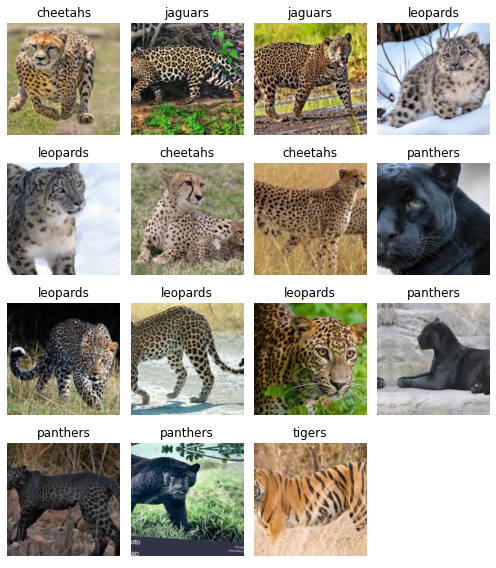

In [9]:
data.show_batch(rows=5, figsize=(7, 8))

In [10]:
from fastai.metrics import error_rate # 1 - accuracy
learn = create_cnn(data, models.resnet34, metrics=error_rate)
# The created model uses the resnet34 architecture, with weights pretrained on the imagenet dataset.
# By default, only the fully connected layers at the top are unfrozen (can be trained), 
# which if you are familiar with transfer learning makes perfect sense.

/opt/conda/lib/python3.7/site-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [11]:
# # defaults.device = torch.device('cuda') # makes sure the gpu is used
# learn.fit_one_cycle(3)

In [12]:
# # Will take too long without GPU
# learn.unfreeze() # must be done before calling lr_find
# learn.lr_find()
# learn.recorder.plot()

In [14]:
learn.fit_one_cycle(6, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,3.021561,1.939560,0.714286,00:03
1,3.161754,1.795903,0.714286,00:03
2,2.983022,1.647861,0.571429,00:02
3,2.631744,1.602579,0.571429,00:02
4,2.367096,1.565017,0.571429,00:02
5,2.305732,1.546855,0.571429,00:02


In [15]:
# learn.save('..animal-detection-stage-1')

## Interpretation

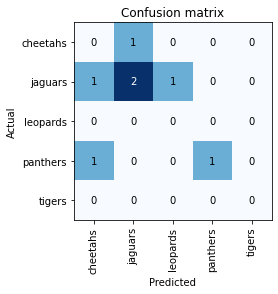

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

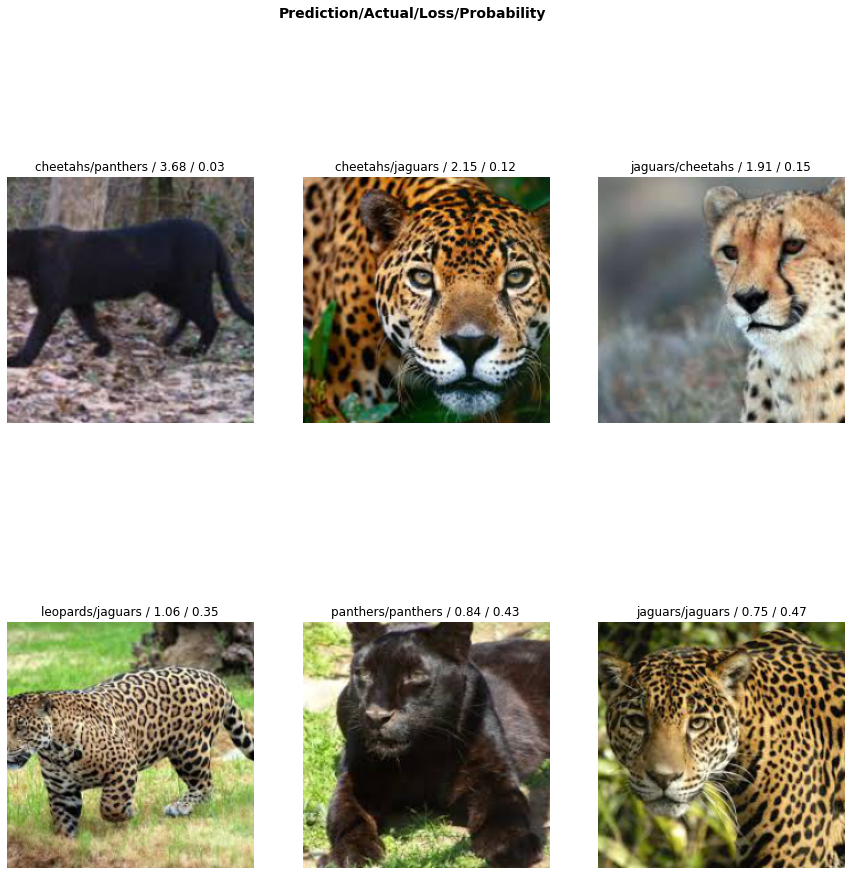

In [20]:
interp.plot_top_losses(6, figsize=(15,15))
# Show images in `top_losses` along with their prediction, actual, loss, and probability of actual class.

In [ ]:
learn.summary()